In [ ]:
"""
Introduction to Python Analysis and Plotting (Matplotlib, Plotly)
(Created for UBC Engineering Physics 259)

@authors: Alexandra Tully, Tim Child
@date: 30 July 2020
"""

# I. Introduction



In Python Jupyter notebooks there are code cells and text cells. This is a text cell; the default cell is a code cell. You can convert between them using `ctrl+M+M` and `ctrl+M+Y`. For additional keyboard shortcuts, see the following resource: https://medium.com/@tuewithmorris/google-colab-notebooks-keyboard-shortcuts-aa6a008fb91b

In this file, we show examples of plotting with 2 python plotting libraries: Matplotlib and Plotly. **Matplotlib is very similar to Matlab plotting, and this is what we suggest you use for any plots you intend to use in your lab writeup.** However, Plotly makes simple, interactive plots easily in Jupyter environments, which can be useful. **Be warned, we never figured our how to export Plotly images from colab to pdf/html.** If you haven't used either before, go through our tutorial and take a look at the following comparison: https://www.analyticsvidhya.com/blog/2020/03/6-data-visualization-python-libraries/?fbclid=IwAR3arLn9rn9eySD2SLR9kiW666XEnWjtv6O0MsZpm7MlFvyUmooJP3pjQ0w

Show keyboard shortcuts / help: `ctrl+M+H`

# II. Getting Started

## (A) Accessing Your Data

### (A.1) Import Packages -- you must import the relevant packages in every script!

In [ ]:
%%capture
# capture prevents cell output (try without it if you're curious)
import pandas as pd  # for reading data files into a table
import numpy as np  # for working with data
!pip install lmfit  # install lmfit
import lmfit as lm  # for fitting data
import os  # for working with operating system (e.g. file_paths)

# Required for Matplotlib Plotting
import matplotlib as mpl  # Matplotlib "manager"
import matplotlib.pyplot as plt  # Matlab style plotting
mpl.rcParams['font.size'] = 15  # increases the font size when plotting with Matplotlib (optional - can comment out)
mpl.rcParams['figure.figsize'] = (15, 5)  # increases the figure size when plotting with Matplotlib (optional - can comment out)

# Required for Plotly Plotting
import plotly.express as px  # Plotly style plotting (interactive)
import plotly.graph_objects as go
from plotly.subplots import make_subplots  

# Required for Advanced Plotting
from plotly.tools import mpl_to_plotly  # for converting matplotlib figures to plotly figures
from plotly.offline import iplot  # for exporting to plot.ly

     |████████████████████████████████| 266kB 2.6MB/s 
     |████████████████████████████████| 215kB 4.5MB/s 
     |████████████████████████████████| 256kB 6.0MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81991 sha256=950d3bb03479fcb9048b81ceed02c8f96f2b9a75c19e04f4dedeeb0bb8fb8fee
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.19-cp36-none-any.whl size=17486 sha256=f9175b1a93d50a2609030472fdd9abe30657e5e0f3d80f5cc68ee4eb261ca770
  Stored in directory: /root/.cache/pip/wheels/59/da/bf/62853db4291f1c5f91326e32e4d1766b8cfcccd1c0e6eaf53f
Successfully built lmfit asteval


### (A.2) Give Colab Access to Your Google Drive Files

Open the help menu (`ctrl+M+H`). Scroll down and find the option to "Mount Drive." Create the following keyboard shortcut for it: `ctrl+D`

Press `ctrl+D` and follow the directions to mount your drive.

### (A.3) Create Variable for Data Directory

In [ ]:
dir_path = 'ENPH259/Python_Introduction'  # change this to your data directory path - e.g. ENPH259/Lab1
ddir = f'/content/drive/My Drive/{dir_path}'

### (A.4) List Contents of Data Directory

In [ ]:
print(os.listdir(ddir))

['sine1khz.csv', 'sine1khz.txt', 'scatter.xlsx', 'square1khz.txt', 'PyAnalysisGuide.ipynb']


## (B) Load Data into Dataframe



Note: You'll need to determine where your data starts. If you get the error `ParserError: Error tokenizing data. C error: Expected 1 fields in line 33, saw 2`, this likely means you have the wrong header value. Open your dataset in notepad or texteditor and see what line the comments end on. That line number will probably work as your header value. You may need to play around with this a bit.

### (B.1) Example: .csv

In [ ]:
data_path = os.path.join(ddir, 'sine1khz.csv')
df = pd.read_csv(data_path, header=31)  # first 31 lines are comments 
df  # df stands for dataframe

,Time (s),Channel 2 (V)
0,-0.004658,0.395067
1,-0.004657,0.389027
2,-0.004656,0.383658
3,-0.004655,0.376947
4,-0.004654,0.371243
...,...,...
8187,0.003856,-0.317639
8188,0.003857,-0.311934
8189,0.003859,-0.304888
8190,0.003860,-0.297841


### (B.2) Example: .txt

In [ ]:
data_path = os.path.join(ddir, 'square1khz.txt')
df_square = pd.read_csv(data_path, header=31, sep='\t')  # still 31 comment lines at the top, and the values are tab (\t) separated instead of comma separated
df_square

,Time (s),Channel 2 (V)
0,-0.002580,0.998383
1,-0.002579,0.998048
2,-0.002579,0.997712
3,-0.002578,0.997712
4,-0.002578,0.998719
...,...,...
8187,0.002578,-1.008869
8188,0.002578,-1.008869
8189,0.002579,-1.008869
8190,0.002580,-1.008534


### (B.3) Example: .xlsx

In [ ]:
data_path = os.path.join(ddir, 'scatter.xlsx')
df_scatter = pd.read_excel(data_path)
df_scatter

,x,y
0,0.00000,4.687028
1,0.10101,0.388155
2,0.20202,3.510516
3,0.30303,4.183807
4,0.40404,3.484237
...,...,...
95,9.59596,12.127603
96,9.69697,12.469333
97,9.79798,13.571772
98,9.89899,14.584914


# III. Plotting Data (Part 1)

## (A) Get Data from  Dataframe

In [ ]:
# Get X and Y Data from Dataframe (Sine Wave) Using Column Names
x_data = df['Time (s)']
y_data = df['Channel 2 (V)']

In [ ]:
# Get X and Y Data from df_square (Square Wave) Using Index Location
x_square = df_square.iloc[:,0]  # colon means all
y_square = df_square.iloc[:,1]

In [ ]:
# Get X and Y Data from df_scatter (Scatter) Using Index Location
x_scatter = df_scatter.iloc[:,0]  # colon means all
y_scatter = df_scatter.iloc[:,1]

## (B) Plotting with Matplotlib

### (B.1) Plotting Scatterplot

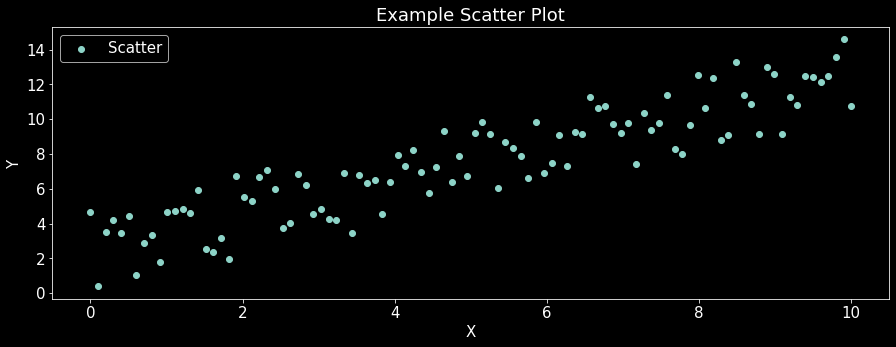

In [ ]:
# Create Figure
fig, ax = plt.subplots(1)  # creates figure with one set of axes for plotting

# Add Data
ax.scatter(x_scatter, y_scatter, label='Scatter')  # label will only appear if you use legend functionality (see below)

# Format Figure
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Example Scatter Plot')
ax.legend()  # updates legend, or adds legend if not already present

### (B.2) Plotting Line Graph

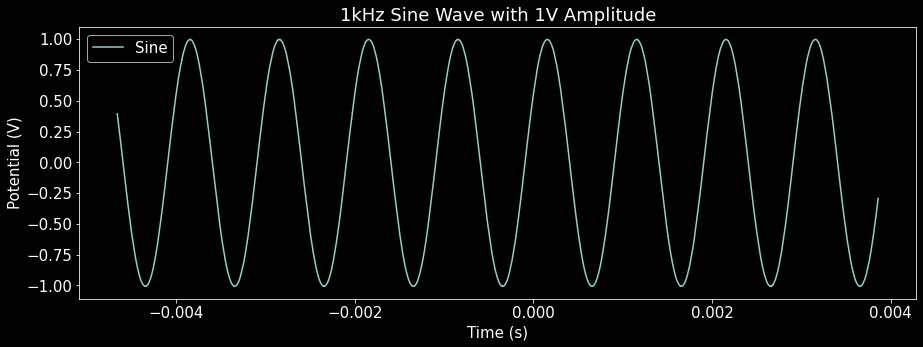

In [ ]:
# Create Figure
fig, ax = plt.subplots(1)

# Add Data
ax.plot(x_data, y_data, label='Sine')

# Format Figure
ax.set_xlabel('Time (s)')
ax.set_ylabel('Potential (V)')
ax.set_title('1kHz Sine Wave with 1V Amplitude')
ax.legend()

### (B.3) Adding a Point (and Errorbars) to a Line Graph

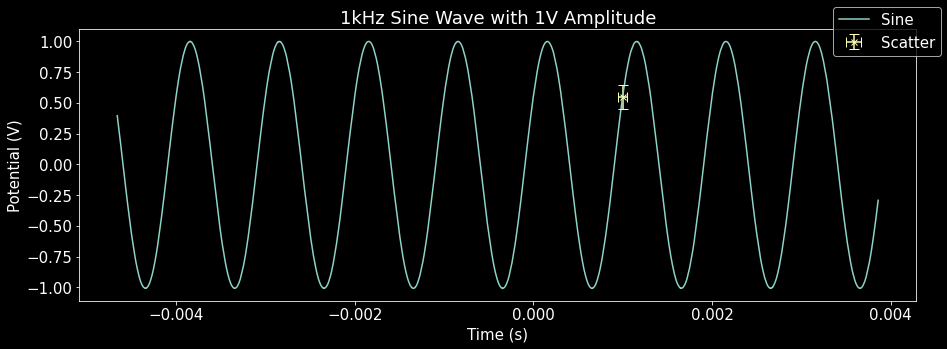

In [ ]:
# Add Point
#ax.scatter([0.001000], [0.546399], label='Scatter', marker='x')

# Add Point with Errorbar
ax.errorbar([0.001000], [0.546399], xerr=0.00005, yerr=0.1, label='Scatter', marker='x', capsize=5, linestyle='')
ax.legend(loc=(0.9, 0.9))  # Specifies location of legend
fig  # need to call fig if showing figure from previous cell

## (C) Plotting with Plotly

### (C.1) Plotting Scatterplot

In [ ]:
# Create Figure
fig = go.Figure()

# Add Data
data = go.Scatter(x=x_scatter, y=y_scatter, mode='markers', name='Scatter')
fig.add_trace(data)

# Format Figure
fig.update_layout(dict(xaxis_title='Time (s)', yaxis_title='Potential (V)', title='Example Scatter Plot'), legend=dict(yanchor='top', y=1.2, xanchor='right', x=1.1))
fig.update_traces(showlegend=True)  # for a single data series on a plot, the default is no legend; this forces a legend
fig.update_layout(template='plotly_dark')  # dark mode
fig.show()

### (C.2) Plotting Line Graph

In [ ]:
# Create Figure
fig = go.Figure()

# Add Data
data = go.Scatter(x=x_data, y=y_data, mode='lines', name='Sine')
fig.add_trace(data)

# Format Figure
fig.update_layout(dict(xaxis_title='Time (s)', yaxis_title='Potential (V)', title='1kHz Sine Wave with 1V Amplitude'), legend=dict(yanchor='top', y=1.2, xanchor='right', x=1.1))
fig.update_traces(showlegend=True)  # for a single data series on a plot, the default is no legend; this forces a legend
fig.update_layout(template='plotly_dark')  # dark mode
fig.show()

### (C.3) Adding a Point (and Errorbars) to a Line Graph

In [ ]:
# Add Point with Errorbar
fig.add_scatter(x= [0.001000], y= [0.546399], error_x=dict(type= 'constant', value= 0.00005), error_y=dict(type= 'constant', value = 0.1), showlegend=True, name='Scatter')  # x and y data must be in list-form (square brackets) 
fig.show()

# IV. Working with Data

## (A) Pandas Dataframes

### (A.1) Dataframe View Formats

Example 1: Default View

In [ ]:
# Default Format
df

,Time (s),Channel 2 (V)
0,-0.004658,0.395067
1,-0.004657,0.389027
2,-0.004656,0.383658
3,-0.004655,0.376947
4,-0.004654,0.371243
...,...,...
8187,0.003856,-0.317639
8188,0.003857,-0.311934
8189,0.003859,-0.304888
8190,0.003860,-0.297841


Example 2: Full View

In [ ]:
%load_ext google.colab.data_table
df

In [ ]:
# Revert to Default View
%unload_ext google.colab.data_table

### (A.2) Retrieving Specific Values

Let's say we want to find the value of our Channel 2 (V) when Time (s) = 0.

Example 1: Entry in DF for Time (s) == 0  

In [ ]:
df['Time (s)'] == 0  # where does the df Time (s) column == 0? Looks like False everywhere, but let's double-check

0       False
1       False
2       False
3       False
4       False
        ...  
8187    False
8188    False
8189    False
8190    False
8191    False
Name: Time (s), Length: 8192, dtype: bool

In [ ]:
df[df['Time (s)'] == 0]  # this tries to find the entry in the original dataframe that corresponds to a "True" line of the above dataframe (it's unsuccessful)

,Time (s),Channel 2 (V)


Example 2: Entry in DF for Time (s) Close to 0 

In [ ]:
df[np.isclose(df['Time (s)'], 0, atol=0.000001)]  # what is within atol value of Time (s) == 0 in df? (atol: absolute tolerance)

,Time (s),Channel 2 (V)
4478,-9.013333e-07,0.545393
4479,1.386667e-07,0.550426


In [ ]:
df[np.isclose(df['Time (s)'], 0, atol=0.000001)]['Channel 2 (V)']  # return only the Channel 2 values 

4478    0.545393
4479    0.550426
Name: Channel 2 (V), dtype: float64

Example 3: Entry in DF for Time (s) Closest to .001

In [ ]:
np.argmin(abs(df['Time (s)']-0.001))  # gives the index of when time is closest to .001 s (example = 5440)

5440

In [ ]:
df.iloc[5440]  # find the dataframe entry for the given index (example = 5440)

Time (s)         0.001000
Channel 2 (V)    0.546399
Name: 5440, dtype: float64

## (B) Numpy Arrays

There are several great libraries in Python for working with data, most notably Numpy and Pandas. Here we will look at the most popular and a common starting place, Numpy. (Pandas builds on top of Numpy and they work together very well).

The Numpy package provides many of the same functions as found in Matlab, plus many many more. 

To use Numpy, the numpy package must first be imported into the script using an import statement. It is common to import numpy like this: `import numpy as np`. The as `np` part just makes it quicker to type when using later. As with all import statements, they need only be run once, but it doesn't hurt to run them multiple times.

e.g.
```
import numpy as np
xdata = np.array([1,2,3,4,5,6,7,8])
```
To create a numpy array from scratch. Or
```
xdata = np.linspace(0, 100, 1000)  # Creates a 1D array with 1000 values from 0 -> 100
ydata = np.sin(xdata)  # Creates a 1D array with sin(x) evaluated at each xdata value
```

The Numpy package has extremely good documentation which can be found [here](https://numpy.org/doc/stable/user/absolute_beginners.html). 

Additionally, any question you might have that doesn't have an obvious answer in the documentation has 99.9% of the time, been asked on StackOverflow (https://stackoverflow.com/) already, and the answers are usually extremely helpful. (Seriously, the effort people have put into answering questions about all things Python is incredible). 

### (B.1) Viewing Data in Arrays

It's often useful to get a quick idea of what values are in an array, even before plotting. A couple of ways are:

1. Leave the array as the last line of a cell and run it:

In [ ]:
import numpy as np
x = np.linspace(-3, 7, 11)
x

array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

2. Print the array anywhere in the cell:

In [ ]:
y = x**2  # double star means 'to the power of'
print(y)
y = y*3  
print(y)

[ 9.  4.  1.  0.  1.  4.  9. 16. 25. 36. 49.]
[ 27.  12.   3.   0.   3.  12.  27.  48.  75. 108. 147.]


### (B.2) Retrieving Specific Values

It's often useful to find values, or where values are in arrays of data. 

Here I'll go over just a few examples, if you still have questions, StackOverflow is your friend!

In [ ]:
#  Making some sample data
x = np.linspace(-10, 10, 1000)  
y = 2.1*x**2 -17.6*x + 14.3 

# Now I want to find the minimum y value and store it in a variable called 'y_min'
y_min = np.min(y)  

# If I want to find the index of the array at which it is minimum, then I would argmin instead
y_min_index = np.argmin(y) 
print(f'The index at y_min is = {y_min_index}')  # remember f' ' makes a format string

# Then I could use that index to find out what the x value was at the minimum y value
print(f'y has a minimum value of {y_min:.2f} at x = {x[y_min_index]:.2f}')

The index at y_min is = 709
y has a minimum value of -22.58 at x = 4.19


## (C) LaTeX / Equations in Python

LaTeX is a widely used formatting scripting language called LaTeX (or Tex) which is superior to render mathematical expressions and is used widely. It's definitely worth learning ASAP.

To insert an expression wrap the LaTeX formatted equation in either `$` signs for inline equations, or `$$` for full line equations

e.g. If you enter

`$$\alpha^2+\beta^2=c^2$$`

This is the result: 
$$\alpha^2+\beta^2=c^2$$

Single `$` signs allow you to put equations in the $\alpha^2+\beta^2=c^2$ middle of sentences.

Go to https://www.codecogs.com/latex/eqneditor.php or https://www.latex4technics.com/ for help with writing LaTeX equations.

Here is an example of a more complicated formula,

`$$P_\lambda = \frac{2 \pi h c^2}{\lambda^5 \left(e^{\left(\frac{h c}{\lambda k T}\right)} - 1\right)}$$`
$$P_\lambda = \frac{2 \pi h c^2}{\lambda^5 \left(e^{\left(\frac{h c}{\lambda k T}\right)} - 1\right)}$$

# V. Plotting Data (Part 2)

## (A) Matplotlib

### (A.1) Plot Our Data Point (from Dataframe)

In [1]:
# Create Figure
fig, ax = plt.subplots(1)

# Add Data
ax.plot(x_data, y_data, label='Sine')
ax.scatter(df.iloc[5440, 0], df.iloc[5440, 1], label='Point', marker='x')

# Format Figure
ax.set_xlabel('Time (s)')
ax.set_ylabel('Potential (V)')
ax.set_title('Example Sine Wave with Data Point')
ax.legend(loc=(0.9, 0.9))  # Includes legend and specifies location

NameError: ignored

### (A.2) Plot Multiple Lines on Same Axes

In [2]:
# Create Figure
fig, ax = plt.subplots(1)

# Add Data
ax.plot(x_data, y_data, label='Sine')
ax.plot(x_square, y_square, label='Square')

# Format Figure
ax.set_xlabel('Time (s)')
ax.set_ylabel('Potential (V)')
ax.set_title('Sine and Square Example Waves')
ax.legend(loc=(0.9, 0.9))

NameError: ignored

In [ ]:
#Reset X-Axis Limits
ax.set_xlim(-0.002, 0.002)
fig

### (A.3) Plot Multiple Lines on Same Axes, Different Y-Scale

In [ ]:
# Create Figure
fig, ax = plt.subplots(1)
axr = ax.twinx()  # create second y-axis on right side of graph

# Add Data
ax.plot(x_data, y_data, label='Sine')
axr.plot(x_square, y_square, label='Square', color = 'C1')  # default color wheel is 'C0' to 'C8'; can also write 'yellow' etc.
ax.plot([], [], label='Square', color = 'C1')  # easy way to include the right y-axis data lable in legend 

# Format Figure
ax.set_xlabel('Time (s)')
ax.set_ylabel('Potential (V)')
ax.set_title('Sine and Square Example Waves')
ax.legend(loc='best', fontsize=12)  # 'best' location is default for legend
ax.set_xlim(-0.002, 0.002)

### (A.4) Plot Multiple Lines on Different Axes

In [ ]:
# Create Figure
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)  # sharex defaults to False; play with having this on or not
axs = axs.flatten()  # makes 1D array of axes -- you can ignore this, it just makes it easier to index between separate axes

# Add Data (2 Axes)
axs[0].plot(x_data, y_data, label='Sine')
axs[1].plot(x_square, y_square, label='Square')

# Format Figure
axs[1].set_xlabel('Time (s)')

for ax, title in zip(axs, ['Sine Wave Example', 'Square Wave Example']):  # for loop example
  ax.set_ylabel('Potential (V)')
  ax.set_title(title)
  ax.legend(fontsize=12)
  ax.set_xlim(-0.002, 0.002)

plt.tight_layout()  # makes layout of the 2 axes nicer with respect to one another

## (B) Plotly

### (B.1) Plot Our Data Point (from Dataframe)

In [ ]:
# Create Figure
fig = go.Figure()

# Add Data
data = go.Scatter(x=x_data, y=y_data, mode='lines', name='Sine')
fig.add_trace(data)
fig.add_scatter(x= [df.iloc[5440, 0]], y= [df.iloc[5440, 1]], name='Point')  # x and y values must be list-like, need square brackets

# Format Figure
fig.update_layout(dict(xaxis_title='Time (s)', yaxis_title='Potential (V)', title='Example Sine Wave with Data Point'), legend=dict(yanchor='top', y=1.2, xanchor='right', x=1.1))
fig.show()

### (B.2) Plot Multiple Lines on Same Axes

In [ ]:
# Create Figure
fig = go.Figure()

# Add Data
data = go.Scatter(x=x_data, y=y_data, mode='lines', name='Sine')
data2 = go.Scatter(x=x_square, y=y_square, mode='lines', name='Square')
fig.add_traces([data, data2])

# Format Figure
fig.layout.xaxis.range = [-0.00225, 0.00225]
fig.update_layout(dict(xaxis_title='Time (s)', yaxis_title='Potential (V)', title='Sine and Square Example Waves'), legend=dict(yanchor='top', y=1.2, xanchor='right', x=1.1))
fig.show()

### (B.3) Plot Multiple Lines on Same Axes, Different Y-Scale

In [ ]:
# Create Figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Data
data = go.Scatter(x=x_data, y=y_data, mode='lines', name='Sine')
data2 = go.Scatter(x=x_square, y=y_square, mode='lines', name='Square')
fig.add_traces([data, data2], secondary_ys=[False, True])

# Format Figure
fig.layout.xaxis.range = [-0.00225, 0.00225]
fig.update_layout(dict(xaxis_title='Time (s)', yaxis_title='Potential (V)', title='Sine and Square Example Waves'), legend=dict(yanchor='top', y=1.2, xanchor='right', x=1.1))
fig

### (B.4) Plot Multiple Lines on Different Axes

In [ ]:
# Create Figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, x_title='Time (s)', y_title='Potential (V)', subplot_titles=['Sine Wave Example', 'Square Wave Example'])

# Add Data
data = go.Scatter(x=x_data, y=y_data, mode='lines', name='Sine')
data2 = go.Scatter(x=x_square, y=y_square, mode='lines', name='Square')
fig.add_traces([data, data2], rows=[1,2], cols=[1,1])  # adds data to row1, col1; data2 to row2, col1

# Format Figure
fig.update_xaxes(range = [-0.00225, 0.00225])
fig

# VI. Fitting Data

## (A) Noisy Data

### (A.1) Generate Noisy Data

In [ ]:
x = np.linspace(0, 10, 100)  # linearly spaced x from 0 to 10, with 100 steps
y = 3*np.sin(1.2*x)+np.random.random(100)*5  # np.sin function with random noise, 100 steps

## (B) Create Fit Function

In [ ]:
# Define Fit Function
def fit_func(x, a, b, c, d):  # create a function which takes x coordinate and parameter values and returns the y value
  y = a*np.sin(b*x + c) + d  # replace this with your fit function (example: sine wave)
  return y

# Convert Fit Function to Model
model = lm.Model(fit_func)  # turns the function into a model which can be used for fitting

# Add Parameters (intial values and constraints)
params = lm.Parameters()  # empty object to hold all fitting parameters
params.add(name='a', value=0.9, vary=True, min=-np.inf, max=np.inf)  # add param 'a' (allowed to vary, no min or max -- inf means infinity)
params.add('b', 1)  # equivalent to above due to defaults
params.add('c', 0)
params.add('d', 0)

# Data Format Check
y = y.astype(np.float32)  # ensures data is np.float32 (NECESSARY)

# Fits and Returns lm.FitResult
fit = model.fit(y, x=x, params=params)  # y = data to fit; we're passing in corresponding x data and the fitting parameters

# Print Fit Values
print(fit.fit_report())

# Print Confidence Interval Report
print('\nConfidence Interval Report:')
ci = fit.conf_interval()
lm.printfuncs.report_ci(ci)

[[Model]]
    Model(fit_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 47
    # data points      = 100
    # variables        = 4
    chi-square         = 203.210525
    reduced chi-square = 2.11677630
    Akaike info crit   = 78.9072325
    Bayesian info crit = 89.3279133
[[Variables]]
    a:  3.14973580 +/- 0.20554030 (6.53%) (init = 0.9)
    b:  1.22086423 +/- 0.02296547 (1.88%) (init = 1)
    c: -0.12451076 +/- 0.12759344 (102.48%) (init = 0)
    d:  2.42168943 +/- 0.14666763 (6.06%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -0.856
    C(b, d) =  0.124
    C(a, b) =  0.114
    C(a, c) = -0.103

Confidence Interval Report:
      99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 a:  -0.63250  -0.41634  -0.20666   3.14974  +0.20688  +0.41720  +0.63449
 b:  -0.08073  -0.05184  -0.02514   1.22086  +0.02416  +0.04786  +0.07172
 c:  -0.36948  -0.24440  -0.12230  -0.12451  +0.12543  +0.25738  +0.399

Question: Are the fit values what you would expect given the model? Why is d not 0?

## (C) Fitting Data in Matplotlib

### (C.1) Plot Noisy Data (Matplotlib)

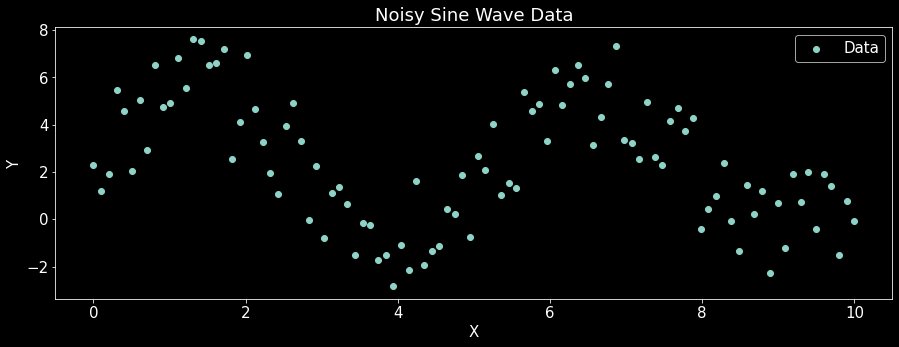

In [ ]:
# Create Figure
fig, ax = plt.subplots(1)

# Add Data
ax.scatter(x, y, label='Data')

# Format Figure
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Noisy Sine Wave Data')
ax.legend()

### (C.2) Plot Fit Function (Matplotlib)

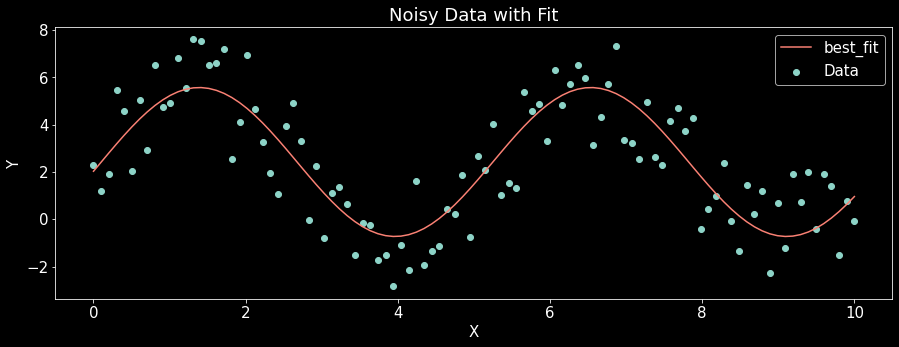

In [ ]:
# Create Figure
fig, ax = plt.subplots(1)

# Add Data
ax.scatter(x, y, label='Data')
ax.plot(x, fit.best_fit, label='best_fit', color='C3')

# Format Figure
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Noisy Data with Fit')
ax.legend()

### (C.3) Show Confidence Interval (Matplotlib)

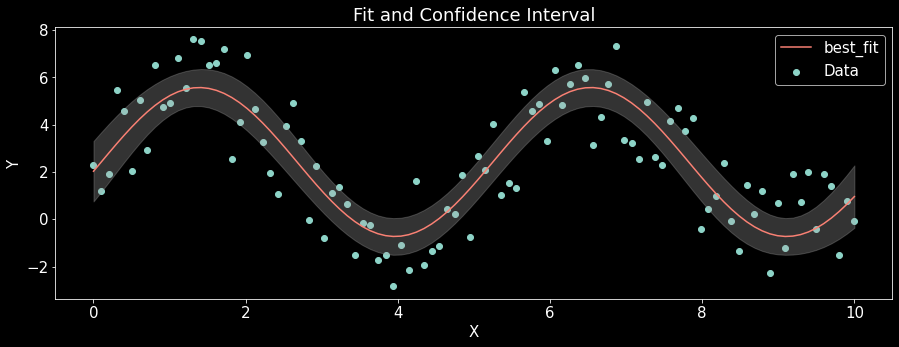

In [ ]:
# Create Figure
fig, ax = plt.subplots(1)

# Add Data
ax.scatter(x, y, label='Data')
ax.plot(x, fit.best_fit, label='best_fit', color='C3')

# Format Figure
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Fit and Confidence Interval')

# Calculate Uncertainty (Delta Y)
dely = fit.eval_uncertainty(sigma=3)

# Add Uncertainty
ax.fill_between(x=x, y1=fit.best_fit+dely, y2=fit.best_fit-dely, color='#ABABAB', alpha=0.3)

ax.legend()

## (D) Fitting Data in Plotly

### (D.1) Plot Noisy Data (Plotly)

In [ ]:
# Create Figure
fig = go.Figure()

# Add Data
data = go.Scatter(x=x, y=y, name='Data', mode='markers')
fig.add_trace(data)

# Format Figure
fig.update_layout(xaxis_title='X', yaxis_title = 'Y', title='Noisy Sine Wave Data', showlegend=True)

fig

### (D.2) Plot Fit Function (Plotly)

In [ ]:
# Create Figure
fig = go.Figure()

# Add Data
data_scatter = go.Scatter(x=x, y=y, mode='markers', name='Data')
fit_line = go.Scatter(x=x, y=fit.best_fit, name='best_fit', mode='lines')
fig.add_traces([data_scatter, fit_line])

# Format Figure
fig.update_layout(xaxis_title='X', yaxis_title='Y', title='Noisy Data with Fit')

fig

### (D.3) Show Confidence Interval (Plotly)

In [ ]:
# Create Figure
fig = go.Figure()

# Add Data
data_scatter = go.Scatter(x=x, y=y, mode='markers', name='Data')
fit_line = go.Scatter(x=x, y=fit.best_fit, name='best_fit', mode='lines')
fig.add_traces([data_scatter, fit_line])

# Format Figure
fig.update_layout(xaxis_title='X', yaxis_title='Y', title='Fit and Confidence Interval')
fig.update_layout(template='plotly_dark')

# Calculate Uncertainty (Delta Y)
dely = fit.eval_uncertainty(sigma=3)

# Add Uncertainty
uncertainty_upper = go.Scatter(x=x, y=fit.best_fit+dely, mode='lines', line=dict(width=0), showlegend=False)
uncertainty_lower = go.Scatter(x=x, y=fit.best_fit-dely, mode='lines', fill='tonexty', line=dict(width=0), fillcolor='rgba(130,130,130,0.3)', name='Confidence Interval')
fig.add_traces([uncertainty_upper, uncertainty_lower])

fig.show()

# VII. Plotting Data (Part 3)

## (A) Export Matplotlib Figure to Plotly Figure

### (A.1) Create Matplotlib Figure

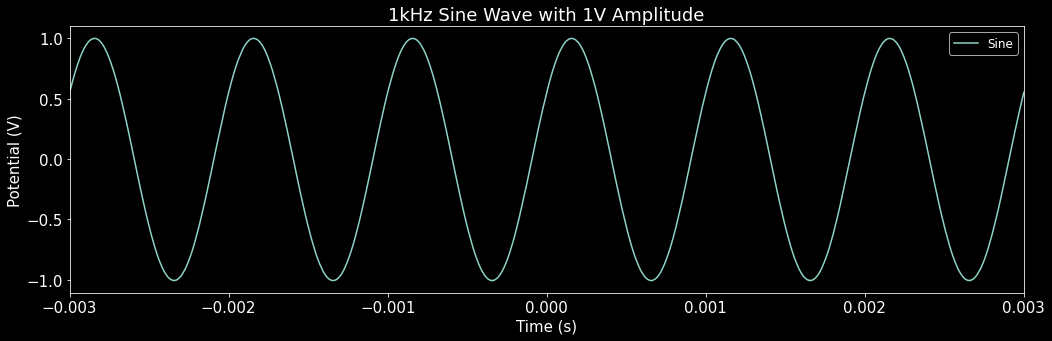

In [ ]:
# Create Figure
fig, ax = plt.subplots(1)

# Add Data
ax.plot(x_data, y_data, label='Sine')

# Format Figure
ax.set_xlabel('Time (s)')
ax.set_ylabel('Potential (V)')
ax.set_title('1kHz Sine Wave with 1V Amplitude')
ax.legend(fontsize=12)  # Includes legend and specifies location
ax.set_xlim(-0.003, 0.003)
plt.tight_layout()

### (A.2) Export to Plotly Using iplot

In [ ]:
fig  # call Matplotlib figure

pfig = mpl_to_plotly(fig)  # export to plotly figure
pfig.update_layout(template='plotly_dark')  # optional dark formatting
iplot(pfig)  # plot plotly figure

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



## (B) Export Plotly Figure to plot.ly

(plot.ly is an interactive platform that will open up in a new web browser tab when you click link in bottom right corner of plot)

In [ ]:
# Create Figure
fig = go.Figure()
line = go.Scatter(x=x_data, y=y_data, mode='lines', name='Sine')

# Add Data
fig.add_trace(line)
fig.add_scatter(x= [df.iloc[5440, 0]], y= [df.iloc[5440, 1]], name='Point')  # x and y values must be list-like, need square brackets

# Format Figure
fig.update_layout(dict(xaxis_title='Time (s)', yaxis_title='Potential (V)', title='Example Sine Wave with Data Point'), legend=dict(yanchor='top', y=1.2, xanchor='right', x=1.1))
fig.update_layout(template='plotly_dark')  # dark mode
iplot(fig, show_link=True)

# VIII. Adding an Image

This code generated the following image:
```
<figure>
  <img src="https://drive.google.com/uc?id=1hMuj1vA8E_fR_p16p1r7pF3oSw9NkkDA" width="200"/>
  <figcaption>Figure 1: Safety Cat</figcaption>
</figure>
```

<figure>
  <img src="https://drive.google.com/uc?id=1hMuj1vA8E_fR_p16p1r7pF3oSw9NkkDA" width="200"/>
  <figcaption>Figure 1: Safety Cat</figcaption>
</figure>

# IX. Export to PDF

* Remember to clear any unecessary outputs before you print.
* File --> print to PDF
* Check your pdf is accurate before uploading it to canvas. (Sometimes things need to re-run; if you have a problem, no worries, just let us know and send us your colab file.)